In [ ]:
# importing the libraries
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# loadinng the dataset in pandas dataframe
df = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
# printing the firsr five rows
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# printing the last five rows
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
# printing the shape of the dataset
df.shape

(10000, 14)

In [ ]:
# checking for missing values
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
# printing the unique values in Geography
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
# value counts of unique values
print(df['Geography'].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


In [ ]:
# check for duplicated row
print(df.duplicated().sum())

0


In [ ]:
# value count of target column (Exited)
print(df['Exited'].value_counts())

Exited
0    7963
1    2037
Name: count, dtype: int64


In [ ]:
df.drop(columns = ['RowNumber','CustomerId','Surname'], inplace = True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# converting the categorical column into numerical column
df = df.replace({'Geography':{'France':1,'Spain':2,'Germany':3}})

In [ ]:
df = df.replace({'Gender':{'Male':0,'Female':1}})

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,1,1,42,8,159660.80,3,1,0,113931.57,1
3,699,1,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0


Train Test Split

In [ ]:
# separating the features and target
x = df.drop(columns = ['Exited'])
y = df['Exited']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 1)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(10000, 10) (8000, 10) (2000, 10)


In [ ]:
print(x)

      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619          1       1   42       2       0.00              1   
1             608          2       1   41       1   83807.86              1   
2             502          1       1   42       8  159660.80              3   
3             699          1       1   39       1       0.00              2   
4             850          2       1   43       2  125510.82              1   
...           ...        ...     ...  ...     ...        ...            ...   
9995          771          1       0   39       5       0.00              2   
9996          516          1       0   35      10   57369.61              1   
9997          709          1       1   36       7       0.00              1   
9998          772          3       0   42       3   75075.31              2   
9999          792          1       1   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  


In [ ]:
print(y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


**Scaling**

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [ ]:
print(x_train_scaled)

[[-0.23082038  1.49644863 -0.91509065 ... -1.55337352  0.97725852
   0.42739449]
 [-0.25150912 -0.90651986  1.09278791 ... -1.55337352 -1.02327069
  -1.02548708]
 [-0.3963303   1.49644863  1.09278791 ...  0.64376017  0.97725852
  -0.94479772]
 ...
 [ 0.22433188 -0.90651986  1.09278791 ...  0.64376017  0.97725852
  -0.14096853]
 [ 0.13123255 -0.90651986  1.09278791 ...  0.64376017  0.97725852
   0.01781218]
 [ 1.1656695   1.49644863 -0.91509065 ...  0.64376017 -1.02327069
  -1.15822478]]


In [ ]:
print(x_test_scaled)

[[-1.05008411 -0.88704581 -0.90179633 ...  0.65543311  0.9426421
  -0.04925965]
 [ 0.29631699 -0.88704581 -0.90179633 ...  0.65543311 -1.06084802
  -0.58254072]
 [-1.24686581 -0.88704581  1.10889783 ... -1.52570869  0.9426421
  -0.16313933]
 ...
 [-0.87401628  0.32891829 -0.90179633 ... -1.52570869  0.9426421
   1.07759708]
 [-0.31474197  1.54488239  1.10889783 ...  0.65543311  0.9426421
   1.14197101]
 [ 0.0373937   1.54488239 -0.90179633 ...  0.65543311  0.9426421
  -0.88821212]]


Applying keras

In [ ]:
model = keras.Sequential([
    # keras.layers.Dense(3,activation = 'sigmoid',input_dim = 10),
    # keras.layers.Dense(1,activation = 'sigmoid')

    # to increase the accuracy we increase the number of nodes in each layers
    keras.layers.Dense(16,activation = 'relu',input_dim = 10),
    keras.layers.Dense(16,activation = 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid'),

])

In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 465 (1.82 KB)

 Trainable params: 465 (1.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compiling the neural network
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [ ]:
# fitting into the network
history = model.fit(x_train_scaled,y_train,epochs=10,validation_split = 0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8672 - loss: 0.3324 - val_acc: 0.8475 - val_loss: 0.3441
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8638 - loss: 0.3332 - val_acc: 0.8481 - val_loss: 0.3444
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8649 - loss: 0.3339 - val_acc: 0.8487 - val_loss: 0.3431
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8584 - loss: 0.3467 - val_acc: 0.8450 - val_loss: 0.3464
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8754 - loss: 0.3193 - val_acc: 0.8456 - val_loss: 0.3446
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8503 - loss: 0.3530 - val_acc: 0.8481 - val_loss: 0.3446
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8656 - loss: 0.3310 - val_acc: 0.8506 - val_loss: 0.3440
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8539 - loss: 0.3398 - val_acc: 0.8494 - val_loss: 0.3454
Epoch 9/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - ac

In [ ]:
# showing the 30 weights of 1st layers
model.layers[0].get_weights()

[array([[ 0.20032154, -0.03692943,  0.3700989 , -0.2240154 ,  0.01997946,
          0.09948612, -0.14394175, -0.07432601,  0.13586868, -0.23078057,
          0.29487583,  0.1622432 , -0.14937289, -0.03506756, -0.4458592 ,
          0.03345437],
        [-0.1985188 , -0.04815878,  0.07111876,  0.38368812,  0.4984248 ,
          0.06414387, -0.34464705, -0.1464411 ,  0.21521597, -0.55799353,
         -0.24278325, -0.1128    ,  0.09714644,  0.10189056, -0.26092783,
         -0.21268256],
        [-0.13323528, -0.05406571,  0.02189199, -0.02692968, -0.02964643,
          0.25628412, -0.16106562, -0.47449332, -0.29270625, -0.0185624 ,
         -0.0838746 , -0.06400576, -0.14300318,  0.37545222,  0.07120382,
         -0.02816505],
        [-0.24202093, -0.7319658 , -0.00753164,  0.12962858, -0.1606862 ,
          0.42316303, -0.39005315,  0.1700972 , -0.5922643 ,  0.16856405,
         -0.5000033 , -0.23426744,  0.14316472, -0.36018646,  0.47157818,
          0.19916052],
        [-0.44185114

In [ ]:
# weights of 2nd layers
model.layers[1].get_weights()

[array([[-0.04809029, -0.05983355, -0.26043603, -0.2961941 , -0.178309  ,
         -0.02340075,  0.24665698, -0.01331634,  0.53024834,  0.16521244,
         -0.46298152, -0.27883416, -0.5454955 ,  0.01633224,  0.10477518,
          0.4652781 ],
        [ 0.04703213,  0.31589514, -0.91805756, -0.0641489 , -0.24875446,
          0.27970865,  0.43346992, -0.454792  ,  0.04513629,  0.23697364,
          0.2943732 , -0.9995947 ,  0.21991874, -0.28192797, -0.581616  ,
          0.38765258],
        [-0.43307036, -0.03457268,  0.40405595,  0.29028568,  0.17199412,
          0.21424092, -0.00567949, -0.190953  ,  0.08875278, -0.35951543,
          0.17337145,  0.39717215,  0.36867505, -0.4765326 ,  0.5311352 ,
         -0.35652223],
        [-0.07494209, -0.20924024,  0.49020535, -0.07726438, -0.44375739,
         -0.32217407,  0.16315456,  0.04273465, -0.15027587, -0.63756955,
         -0.06161547,  0.23221308,  0.2335851 , -0.30819613, -0.15040638,
         -0.03235102],
        [-0.67745996

In [ ]:
# testing the data
y_log = model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
y_pred = np.where(y_log > 0.5,1,0)

In [ ]:
# model.evaluate(x_test_scaled,y_test)

acc = accuracy_score(y_test,y_pred)
print("accuracy on test data = ",acc)

accuracy on test data =  0.857


In [ ]:
history.history

{'acc': [0.8621875047683716,
  0.8634374737739563,
  0.86328125,
  0.8626562356948853,
  0.8635937571525574,
  0.8629687428474426,
  0.86328125,
  0.8656250238418579,
  0.864062488079071,
  0.8639062643051147],
 'loss': [0.33574923872947693,
  0.33517417311668396,
  0.3348003327846527,
  0.3340147137641907,
  0.3334076702594757,
  0.33303359150886536,
  0.3320460617542267,
  0.332244336605072,
  0.3322470784187317,
  0.33136460185050964],
 'val_acc': [0.8475000262260437,
  0.8481249809265137,
  0.8487499952316284,
  0.8450000286102295,
  0.8456249833106995,
  0.8481249809265137,
  0.8506249785423279,
  0.8493750095367432,
  0.846875011920929,
  0.8462499976158142],
 'val_loss': [0.34412577748298645,
  0.34440499544143677,
  0.3431037664413452,
  0.3464254140853882,
  0.3445862829685211,
  0.34457001090049744,
  0.3440103828907013,
  0.3454497456550598,
  0.34448981285095215,
  0.34635165333747864]}

In [ ]:
import matplotlib.pyplot as plt


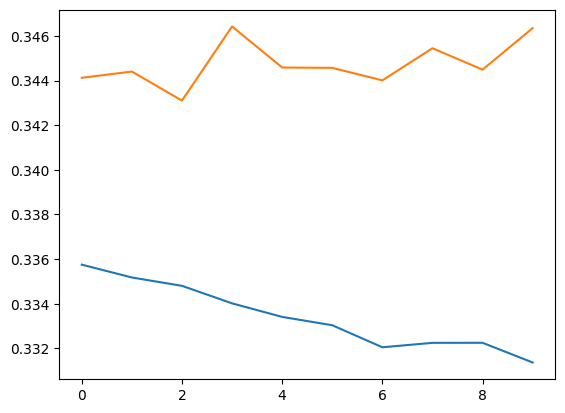

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])